In [ ]:
#| hide
# to hide scanpy's warnings
import logging
logging.basicConfig(level=logging.CRITICAL)
import warnings
# Filter out FutureWarning and UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from pathlib import Path

import pandas as pd
import roux.lib.df as rd

from parag.utils import export_plot

## parameters
output_dir_path='examples/outputs/'
Path(output_dir_path).mkdir(parents=True,exist_ok=True)
## for showing interactive plots in the gh-pages
redirect_fun_html=lambda x: x.split('/',1)[1]
hyperlink="https://rraadd88.github.io/parag#interpretation-as-a-hypergraph-using-proportion-of-degrees-by-communities"

``parag``<a href="#"><img src="https://openmoji.org/data/color/svg/1F386.svg" align="right" width="20%"></a>
====================
**Para**  (beyond pairwise) **G**raph: interactive visualization of higher-order graphs in Python

<!-- [![Contributors][contributors-shield]][contributors-url]
[![Forks][forks-shield]][forks-url]
[![Stargazers][stars-shield]][stars-url] -->
<!-- <a href="">[![PyPI](https://img.shields.io/pypi/v/parag?style=for-the-badge)![Python](https://img.shields.io/pypi/pyversions/parag?style=for-the-badge)](https://pypi.org/project/parag)</a> -->
<a href="">[![build](https://img.shields.io/github/actions/workflow/status/rraadd88/beditor/build.yml?style=for-the-badge)](https://github.com/rraadd88/parag/actions/workflows/build.yml)</a>
<a href="">[![Issues](https://img.shields.io/github/issues/rraadd88/parag.svg?style=for-the-badge)](https://github.com/rraadd88/parag/issues)</a>
<a href="">[![Downloads](https://img.shields.io/pypi/dm/parag?style=for-the-badge)](https://pepy.tech/project/parag)</a>
<a href="">[![GNU License](https://img.shields.io/github/license/rraadd88/parag.svg?style=for-the-badge)](https://github.com/rraadd88/parag/blob/master/LICENSE)</a>
<a href="">[![DOI](https://img.shields.io/badge/DOI-zenodo-blue?style=for-the-badge)](https://doi.org//zenodo.)</a>

## Install

```sh
pip install parag
```

## Interpretation as a hypergraph, using proportion of degrees by communities

Proportion of degrees by communities in a pairwise graph helps reveal how nodes are grouped together and connected within different communities. This analysis highlights clusters of nodes with strong internal connections, potentially representing higher-order relationships. By comparing the degree proportions within and between communities, we can distinguish internal cohesion from inter-community interactions. These insights aid in interpreting the graph as a hypergraph, where communities with high intra-community connections may signify higher-order relationships, offering a richer understanding of complex interactions beyond simple pairwise connections.

Inspired by

> Vehlow, Corinna, Thomas Reinhardt, and Daniel Weiskopf. "Visualizing fuzzy overlapping communities in networks." IEEE Transactions on Visualization and Computer Graphics 19.12 (2013): 2486-2495.  
    [Figure 9B](https://www.researchgate.net/profile/Corinna-Vehlow/publication/256837277/figure/fig4/AS:601696052985880@1520466926646/The-protein-protein-interaction-network-from-Figure-8-shown-with-our-circular-layout-a.png)

Examples:  

### Gene interaction networks

In [ ]:
#| hide
## nodes
nodes=pd.read_csv(
    "https://snap.stanford.edu/biodata/datasets/10033/files/G-HumanEssential.tsv.gz",
    sep='\t',
)
nodes.head(1)

,Gene ID,Essentiality (determined from multiple datasets),Data Source
0,122809,Non-essential,"PMID:26472758,PMID:26472760,PMID:18239125"


In [ ]:
#| hide
## edges
df02=pd.read_csv(
    "https://snap.stanford.edu/biodata/datasets/10013/files/PPT-Ohmnet_tissues-combined.edgelist.gz",
    sep='\t',
)
df02.head(1)

,# protein1,protein2,tissue
0,4790,79155,urinary_bladder


In [ ]:
#| hide
## smallest network
edges=df02.log.query(expr=f"`tissue` == '{df02.groupby('tissue').size().sort_values().index.tolist()[0]}'")
edges.head(1)

,# protein1,protein2,tissue
1249541,1855,8312,cochlea


In [ ]:
#|output: false
from parag.hypergraph import to_net
cfg,df_=to_net(
    nodes=nodes.sort_values('Essentiality (determined from multiple datasets)'),
    edges=edges,
    col_node_id='Gene ID',
    col_source='# protein1',
    col_target='protein2',
    col_subset_id='Essentiality (determined from multiple datasets)',
    show_node_names=True,
    defaults=dict(
        radius=250,
        innerRadius=280,
        outerRadius=295,
        textSize=7,
        textOffset=3,
    ),
)

In [ ]:
#|echo: false
## for html
export_plot(cfg,outp=f"{output_dir_path}/interactions.html",redirect=redirect_fun_html)

In [ ]:
#|echo: false
## for markdown
export_plot(cfg,outp=f"{output_dir_path}/interactions.png",hyperlink=hyperlink)

[![](examples/outputs//interactions.png)](https://rraadd88.github.io/parag#interpretation-as-a-hypergraph-using-proportion-of-degrees-by-communities)

In [ ]:
#| hide
## degree fractions
df_.head(1)

,source,Essential,Non-essential
0,25836,0.0,1.0


### Neighbourhood analysis in latent space e.g. single cell data

In [ ]:
#| hide
## demo data
import scanpy as sc
adata = sc.datasets.pbmc68k_reduced()

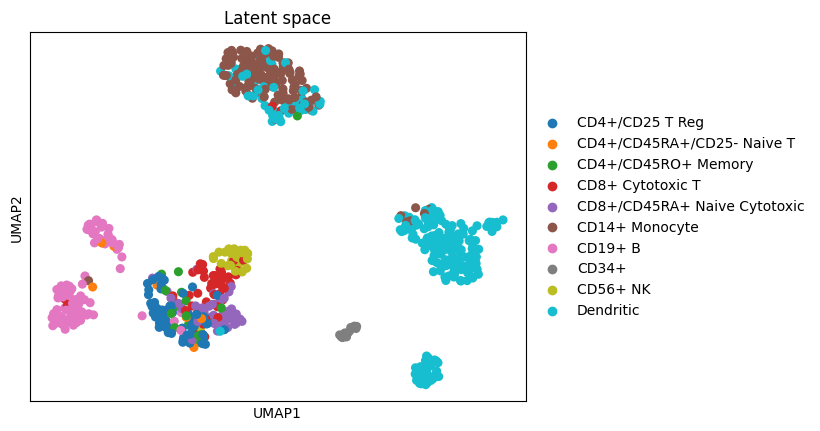

In [ ]:
sc.pl.umap(adata, color="bulk_labels",title='Latent space')

In [ ]:
from parag.core import get_net_data
nodes,edges=get_net_data(adata) ## generated network data by measuring distances in the latent space and thresholding

In [ ]:
#|output: false
from parag.hypergraph import to_net
cfg,df_=to_net(
    nodes,
    edges,
    col_node_id='cell id',
    col_source='cell id1',
    col_target='cell id2',
    col_subset_id='bulk_labels',
    show_node_names=False,
    defaults=dict(
            textSize=8,
            textOffset=3,
    ),
)

In [ ]:
#|echo: false
export_plot(cfg,outp=f"{output_dir_path}/neighbourhoods.html",redirect=redirect_fun_html)

In [ ]:
#|echo: false
export_plot(cfg,outp=f"{output_dir_path}/neighbourhoods.png",hyperlink=hyperlink)

[![](examples/outputs//neighbourhoods.png)](https://rraadd88.github.io/parag#interpretation-as-a-hypergraph-using-proportion-of-degrees-by-communities)

### Heterogeneous graph e.g. drug side-effects network

In [ ]:
#| hide
%reset_selective -f "^df.*"
df02=pd.read_csv(
    "https://snap.stanford.edu/biodata/datasets/10018/files/ChSe-Decagon_monopharmacy.csv.gz",
    sep=',',
    )
df02.head(1)

,# STITCH,Individual Side Effect,Side Effect Name
0,CID003062316,C1096328,central nervous system mass


In [ ]:
## filter
nodes=(df02
    .loc[:,["Individual Side Effect","Side Effect Name"]]
    .log.drop_duplicates()
    .assign(
         #Side Effect type
          subset=lambda df: df['Side Effect Name'].str.split(' ',expand=True)[0],  
    )
    .drop(['Side Effect Name'],axis=1)
    .groupby('subset').filter(lambda df: len(df)>3 and len(df)<10)
    .head(5)
    .sort_values('subset')
    .log('Individual Side Effect') # id
    .log('Individual Side Effect') # name
    )
nodes.head(1)

,Individual Side Effect,subset
1,C0162830,Photosensitivity


In [ ]:
edges=(
    df02
    .log.query(expr=f"`Individual Side Effect` == {nodes['Individual Side Effect'].unique().tolist()}")
    )
edges.head(1)

,# STITCH,Individual Side Effect,Side Effect Name
1,CID003062316,C0162830,Photosensitivity reaction


In [ ]:
## append drugs to nodes
nodes=pd.concat(
    [
        edges.loc[:,['# STITCH']].drop_duplicates().rename(columns={'# STITCH':'node id'},errors='raise').assign(subset='drug'),
        nodes.rename(columns={'Individual Side Effect':'node id'},errors='raise'),
    ],
    axis=0,
    )
nodes.head(1)

,node id,subset
1,CID003062316,drug


In [ ]:
#|output: false
from parag.hypergraph import to_net
cfg,df_=to_net(
    nodes,
    edges,
    col_node_id='node id',
    col_source='# STITCH',
    col_target='Individual Side Effect',
    col_subset_id='subset',
    show_node_names=False,
    defaults=dict(
        radius=200,
        innerRadius=205,
        outerRadius=235,
        textSize=9,
        textOffset=3,
        cornerRadius=3.5,
    ),
)

In [ ]:
#|echo: false
export_plot(cfg,outp=f"{output_dir_path}/heterogeneous.html",redirect=redirect_fun_html)

In [ ]:
#|echo: false
export_plot(cfg,outp=f"{output_dir_path}/heterogeneous.png",hyperlink=hyperlink)

[![](examples/outputs//heterogeneous.png)](https://rraadd88.github.io/parag#interpretation-as-a-hypergraph-using-proportion-of-degrees-by-communities)

### Network communities

In [ ]:
#| hide
## Adapted from https://networkx.org/documentation/stable/auto_examples/algorithms/plot_girvan_newman.html
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load karate graph and find communities using Girvan-Newman
G = nx.karate_club_graph()
communities = list(nx.community.girvan_newman(G))

# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.5, iterations=50, seed=2)
    # plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=200,
        node_color=node_colors,
        with_labels=True,
        # font_size=20,
        font_color="black",
    )

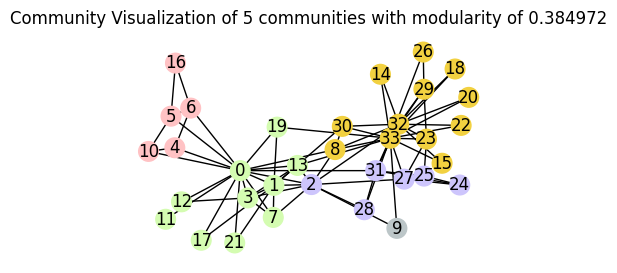

In [ ]:
# Plot graph with colouring based on communities
fig, ax = plt.subplots(1,1, figsize=(5, 3))
visualize_communities(G, communities[3], 2)

In [ ]:
nodes=pd.Series({i:list(t) for i,t in enumerate(communities[3])}).explode().to_frame('node id').reset_index().rename(columns={'index':'community id'}).sort_values('community id')
nodes.head(1)

,community id,node id
0,0,0


In [ ]:
edges=pd.DataFrame(G.edges,columns=['source','target'])
edges.head(1)

,source,target
0,0,1


In [ ]:
#|output: false
from parag.hypergraph import to_net
cfg,df_=to_net(
    nodes.applymap(str),
    edges.applymap(str),
    col_node_id='node id',
    col_source='source',
    col_target='target',
    col_subset_id='community id',
    show_node_names=True,
    defaults=dict(
        radius=180,
        innerRadius=205,
        outerRadius=235,
        textSize=17,
        textOffset=4,
        cornerRadius=3.5,
    ),
)

In [ ]:
#|echo: false
export_plot(cfg,outp=f"{output_dir_path}/communities.html",redirect=redirect_fun_html)

In [ ]:
#|echo: false
export_plot(cfg,outp=f"{output_dir_path}/communities.png",hyperlink=hyperlink)

[![](examples/outputs//communities.png)](https://rraadd88.github.io/parag#interpretation-as-a-hypergraph-using-proportion-of-degrees-by-communities)

## How to cite?  

1. Using BibTeX:   
```
@software{Dandage_parag,
  title   = {parag: interactive visualization of higher-order graphs in Python},
  author  = {Dandage, Rohan},
  year    = {2024},
  url     = {https://doi.org//zenodo.},
  version = {v0.0.1},
  note    = {The URL is a DOI link to the permanent archive of the software.},
}
```

2. DOI link: [![DOI](https://zenodo.org/badge/DOI//zenodo..svg)](https://doi.org//zenodo.), or  

3. Using citation information from [CITATION.CFF file](https://github.com/rraadd88/parag/blob/main/CITATION.cff).

## Future directions, for which contributions are welcome  
- [ ] Showing degree counts in addition to the percentages   
- [ ] Inferring the `defaults` e.g. radii from the input data. 
- [ ] Bind `rotate` signal to the hypergraph and `start/endAngle` to graph.  
- [ ] Set up `tidy` `layout`.
- [ ] Edge coloring by source and target nodes and setting `interaction`s.
- [ ] CI for quicker testing use lighter example.
- [ ] More examples  

